In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Lion
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.layers import SimpleRNN, Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, classification_report, f1_score)
#패키지 import

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#폰트 설치
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')

In [ ]:
df = df.set_index('관측일시')#인덱스로 설정

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 2013-01-05 to 2024-12-28
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가뭄(MSWSI)   626 non-null    float64
 1   가뭄(SPI6)    626 non-null    float64
 2   평균 저수율      626 non-null    float64
 3   평균 용수공급량    626 non-null    float64
 4   평균 강우량      626 non-null    float64
 5   평균기온        626 non-null    float64
 6   평균 유입량-뱡류량  626 non-null    float64
dtypes: float64(7)
memory usage: 39.1+ KB


In [ ]:
df.head(10)

,가뭄(MSWSI),가뭄(SPI6),평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,,,
2013-01-05,0.0,0.0,53.920000,0.693467,0.137613,-9.466667,-0.486933
2013-01-12,-0.5,0.0,51.014286,0.721000,0.000000,-6.942857,-0.558000
2013-01-19,0.0,0.0,48.357143,0.722286,0.000000,-4.957143,-0.524143
2013-01-26,0.0,0.0,45.985714,0.722571,3.638271,-4.571429,-0.523429
2013-02-02,0.5,0.0,43.671429,0.718286,2.076014,-0.828571,-0.222714
2013-02-09,0.0,1.0,44.371429,0.610286,1.276543,-5.642857,0.115857
2013-02-16,0.0,0.0,43.857143,0.622429,0.000000,-4.628571,-0.216714
2013-02-23,-0.5,0.0,42.514286,0.642571,0.066843,-3.414286,-0.320857
2013-03-02,-0.5,0.0,41.028571,0.655429,0.142857,0.828571,-0.198429


In [ ]:
#데이터 분리
target=['가뭄(MSWSI)','가뭄(SPI6)']
X=df.drop(target,axis=1)
y=df[target]
display(X)
display(y)

,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2013-01-05,53.920000,0.693467,0.137613,-9.466667,-0.486933
2013-01-12,51.014286,0.721000,0.000000,-6.942857,-0.558000
2013-01-19,48.357143,0.722286,0.000000,-4.957143,-0.524143
2013-01-26,45.985714,0.722571,3.638271,-4.571429,-0.523429
2013-02-02,43.671429,0.718286,2.076014,-0.828571,-0.222714
...,...,...,...,...,...
2024-11-30,68.400000,0.358571,1.304057,0.885714,-0.131571
2024-12-07,67.742857,0.373571,0.000000,0.942857,-0.177857
2024-12-14,66.757143,0.388429,0.000000,-2.257143,-0.230429


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2013-01-05,0.0,0.0
2013-01-12,-0.5,0.0
2013-01-19,0.0,0.0
2013-01-26,0.0,0.0
2013-02-02,0.5,0.0
...,...,...
2024-11-30,0.5,0.0
2024-12-07,0.0,0.0
2024-12-14,-0.5,0.0


In [ ]:
"""
yc=y[target]
yc[target] = yc[target].replace({ 2: '극한습윤', 1.5: '심한습윤', 1: '보통습윤', 0.5: '약한습윤',0: '정상', -0.5: '약한가뭄', -1: '보통가뭄', -1.5: '심한가뭄', -2: '극한가뭄'})
yc[target] = yc[target].astype('category')
display(yc[target])
yc.info()
"""
#종속변수 3클래스로 바꾸기
y[target] = y[target].replace({ 2: '1', 1.5: '1', 1: '1', 0.5: '1',0: '0', -0.5: '-1', -1: '-1', -1.5: '-1', -2: '-1'})
y[target] = y[target].astype('category')
display(y[target])
y.info()

/tmp/ipython-input-3323220381.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[target] = y[target].replace({ 2: '1', 1.5: '1', 1: '1', 0.5: '1',0: '0', -0.5: '-1', -1: '-1', -1.5: '-1', -2: '-1'})
/tmp/ipython-input-3323220381.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[target] = y[target].astype('category')


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2013-01-05,0,0
2013-01-12,-1,0
2013-01-19,0,0
2013-01-26,0,0
2013-02-02,1,0
...,...,...
2024-11-30,1,0
2024-12-07,0,0
2024-12-14,-1,0


<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 2013-01-05 to 2024-12-28
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   가뭄(MSWSI)  626 non-null    category
 1   가뭄(SPI6)   626 non-null    category
dtypes: category(2)
memory usage: 6.4+ KB


In [ ]:
#train, test 데이터 나누기
test_size = 52#24년 데이터 개수
X_train, X_test = X[:-test_size], X[-test_size:]#독립변수 분할
y_train, y_test = y[:-test_size], y[-test_size:]#종속변수 분할
yc_train, yc_test = yc[:-test_size], yc[-test_size:]#종속변수 분할

In [ ]:
display(X_train.tail(5))
display(y_train.tail(5))
display(yc_train.head(5))
display(X_test.head(5))
display(y_test.head(5))
display(yc_test.head(5))

,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2023-12-02,63.257143,0.381286,0.352557,-1.728571,-0.291000
2023-12-09,61.942857,0.381571,0.847971,2.757143,-0.257857
2023-12-16,70.014286,0.372143,19.862429,1.700000,2.564429
2023-12-23,65.414286,0.397714,0.000000,-10.214286,-2.223857
2023-12-30,63.257143,0.411429,0.285714,-3.371429,0.061000


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2023-12-02,-1,0
2023-12-09,0,0
2023-12-16,1,1
2023-12-23,1,1
2023-12-30,1,1


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2013-01-05,정상,정상
2013-01-12,약한가뭄,정상
2013-01-19,정상,정상
2013-01-26,정상,정상
2013-02-02,약한습윤,정상


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2024-01-06,63.128571,0.401714,1.267371,-0.700000,0.038000
2024-01-13,62.571429,0.400429,0.000000,-3.842857,-0.048429
2024-01-20,61.828571,0.392143,5.513757,-1.100000,-0.154286
2024-01-27,61.000000,0.405857,0.142857,-8.471429,-0.118571
2024-02-03,60.042857,0.423429,0.276543,-3.000000,-0.167286


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2024-01-06,0,1
2024-01-13,0,0
2024-01-20,1,0
2024-01-27,0,0
2024-02-03,-1,0


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2024-01-06,정상,보통습윤
2024-01-13,정상,정상
2024-01-20,약한습윤,정상
2024-01-27,정상,정상
2024-02-03,약한가뭄,정상


In [ ]:
#스케일러 적용
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)#test는 fit하지 않습니다(데이터누수 때문에)

#dataframe으로 변환
X_train_robust   = pd.DataFrame(X_train_robust, columns=X_train.columns, index=X_train.index)
X_test_robust    = pd.DataFrame(X_test_robust, columns=X_test.columns, index=X_test.index)

In [ ]:
#스케일러 적용확인
display(X_train_robust.tail(5))
display(X_test_robust.head(5))


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2023-12-02,-0.863659,0.140671,-0.196367,-0.702542,-0.511178
2023-12-09,-1.050177,0.143586,-0.064407,-0.436441,-0.411436
2023-12-16,0.095286,0.047376,5.000342,-0.499153,8.082115
2023-12-23,-0.557527,0.308309,-0.290275,-1.205932,-6.328031
2023-12-30,-0.863659,0.448251,-0.214171,-0.800000,0.548151


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2024-01-06,-0.881906,0.349125,0.047306,-0.641525,0.478934
2024-01-13,-0.960973,0.336006,-0.290275,-0.827966,0.218831
2024-01-20,-1.066396,0.251458,1.178386,-0.665254,-0.099742
2024-01-27,-1.183984,0.391399,-0.252223,-1.102542,0.007739
2024-02-03,-1.319818,0.570700,-0.216614,-0.777966,-0.138865


In [ ]:
ohe = OneHotEncoder(sparse_output=False)
y_train_ohe  = ohe.fit_transform(yc_train[['가뭄(MSWSI)', '가뭄(SPI6)']])
y_test_ohe  = ohe.transform(yc_test[['가뭄(MSWSI)', '가뭄(SPI6)']])#test는 fit하지 않습니다(데이터누수 때문에)
encoded_y_train = pd.DataFrame(y_train_ohe, columns=ohe.get_feature_names_out(), index=yc_train.index)
encoded_y_test = pd.DataFrame(y_test_ohe, columns=ohe.get_feature_names_out(), index=yc_test.index)
display(encoded_y_train)
display(encoded_y_test)

,가뭄(MSWSI)_극한습윤,가뭄(MSWSI)_보통가뭄,가뭄(MSWSI)_보통습윤,가뭄(MSWSI)_심한가뭄,가뭄(MSWSI)_심한습윤,가뭄(MSWSI)_약한가뭄,가뭄(MSWSI)_약한습윤,가뭄(MSWSI)_정상,가뭄(SPI6)_극한가뭄,가뭄(SPI6)_보통가뭄,가뭄(SPI6)_보통습윤,가뭄(SPI6)_심한가뭄,가뭄(SPI6)_심한습윤,가뭄(SPI6)_정상
관측일시,,,,,,,,,,,,,,
2013-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-01-12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-01-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-02-02,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-02,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2023-12-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2023-12-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,가뭄(MSWSI)_극한습윤,가뭄(MSWSI)_보통가뭄,가뭄(MSWSI)_보통습윤,가뭄(MSWSI)_심한가뭄,가뭄(MSWSI)_심한습윤,가뭄(MSWSI)_약한가뭄,가뭄(MSWSI)_약한습윤,가뭄(MSWSI)_정상,가뭄(SPI6)_극한가뭄,가뭄(SPI6)_보통가뭄,가뭄(SPI6)_보통습윤,가뭄(SPI6)_심한가뭄,가뭄(SPI6)_심한습윤,가뭄(SPI6)_정상
관측일시,,,,,,,,,,,,,,
2024-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2024-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-01-20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-02-03,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-02-10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-02-17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-02-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2024-03-02,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 변수설명
X_train=독립변수 훈련데이터\
X_test=독립변수 테스트데이터\
y_test=종속변수 테스트데이터(원핫인코딩x)\
y_train=종속변수 훈련데이터(원핫인코딩x)\
encoded_y_trian=종속변수 테스트데이터(원핫인코딩o)\
encoded_y_test=종속변수 테스트데이터(원핫인코딩o)\
yc_train=카테고리컬(정상,가뭄 등)\
yc_test=카테고리컬(정상,가뭄 등)



In [ ]:
#라벨인코딩(원핫 사요안하기로 함)

# MSWSI용 encoder
le_mswsi = LabelEncoder()
y_train_mswsi = le_mswsi.fit_transform(y_train['가뭄(MSWSI)'])
y_test_mswsi  = le_mswsi.transform(y_test['가뭄(MSWSI)'])

# SPI6용 encoder
le_spi = LabelEncoder()
y_train_spi = le_spi.fit_transform(y_train['가뭄(SPI6)'])
y_test_spi  = le_spi.transform(y_test['가뭄(SPI6)'])


In [ ]:
# 시계열 데이터셋 구성(슬라이딩 윈도우)
s=12#데이터셋 단위
def make_xy_windows(X, y, time_step=s, horizon=1):#s주 단위, 그 다음주 예측
    X = np.asarray(X)
    y = np.asarray(y)
    Xs, Ys = [], []
    for i in range(len(X) - time_step - horizon + 1):
        Xs.append(X[i : i + time_step])
        Ys.append(y[i + time_step + horizon - 1])
    return np.array(Xs), np.array(Ys)

# 사용 예시
X_train_win_mswsi, y_train_win_mswsi = make_xy_windows(X_train, y_train_mswsi, time_step=s, horizon=1)#종속변수 mswsi 훈련 데이터의 슬라이딩 윈도우
X_test_win_mswsi, y_test_win_mswsi = make_xy_windows(X_test, y_test_mswsi, time_step=s, horizon=1)#종속변수 mswsi 테스트 데이터의 슬라이딩 윈도우
X_train_win_spi, y_train_win_spi = make_xy_windows(X_train, y_train_spi, time_step=s, horizon=1)#종속변수 spi 훈련 데이터의 슬라이딩 윈도우
X_test_win_spi, y_test_win_spi = make_xy_windows(X_test, y_test_spi, time_step=s, horizon=1)#종속변수 spi 테스트 데이터의 슬라이딩 윈도우
print(X_train_win_mswsi.shape)  # (샘플수, s, 특성수)
print(y_train_win_mswsi.shape)  # (샘플수, ...)
print(X_test_win_mswsi.shape)
print(y_test_win_mswsi.shape)
print(X_train_win_spi.shape)
print(y_train_win_spi.shape)
print(X_test_win_spi.shape)
print(y_test_win_spi.shape)


(562, 12, 5)
(562,)
(40, 12, 5)
(40,)
(562, 12, 5)
(562,)
(40, 12, 5)
(40,)


# XGBOOST_분류


[Classification Report]
              precision    recall  f1-score   support

           0     0.6286    0.9565    0.7586        23
           1     0.5000    0.2500    0.3333         8
           2     1.0000    0.1111    0.2000         9

    accuracy                         0.6250        40
   macro avg     0.7095    0.4392    0.4307        40
weighted avg     0.6864    0.6250    0.5479        40



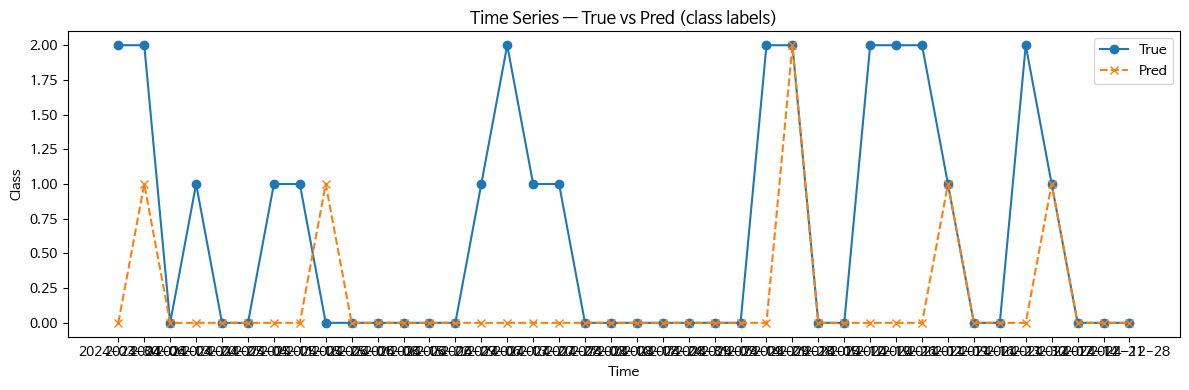

In [ ]:
from xgboost import XGBClassifier

# X를 2D로 펼치기
def flatten_3d(X):
    # X: (N, T, F) -> (N, T*F)
    return X.reshape(X.shape[0], -1)

X_tr = flatten_3d(X_train_win_mswsi)
X_te = flatten_3d(X_test_win_mswsi)


# 모델 정의 & 학습
num_classes = len(set(y_train_win_mswsi))
model = XGBClassifier(
    n_estimators=600,
    max_depth=4,
    learning_rate=0.01,
    objective='multi:softmax',    # 다중분류
    subsample=0.8,
    colsample_bytree=0.8,
    num_class=num_classes,
    random_state=42
)
model.fit(X_tr, y_train_win_mswsi)

# 예측
pred = model.predict(X_te)        # 정수형 클래스 반환

# y_test 준비
y_te = y_test_win_mswsi
if hasattr(y_te, "values"):  # pandas Series면 값만
    y_te = y_te.values
y_te = np.ravel(y_te)        # (N,)로

# 예측
y_pred = pred  # 이미 계산됨 (model.predict(X_te))

# 숫자 지표
acc  = accuracy_score(y_te, y_pred)
bacc = balanced_accuracy_score(y_te, y_pred)


print("\n[Classification Report]")
print(classification_report(y_te, y_pred, digits=4))

# 준비
time_step = X_train_win_mswsi.shape[1]   # 윈도우 길이
horizon   = 1                            # 다음 1주
y_te      = np.ravel(y_test_win_mswsi)

# 타깃 날짜 인덱스 만들기
start = time_step + horizon - 1
test_target_index = y_test.index[start : start + len(y_te)]

#시계열 라인 플롯 (실제 vs 예측)
s_true = pd.Series(y_te, index=test_target_index, name="True")
s_pred = pd.Series(pred,  index=test_target_index, name="Pred")

plt.figure(figsize=(12,4))
plt.plot(s_true.index, s_true.values, marker='o', linestyle='-', label='True')
plt.plot(s_pred.index, s_pred.values, marker='x', linestyle='--', label='Pred')
plt.title("Time Series — True vs Pred (class labels)")
plt.xlabel("Time")
plt.ylabel("Class")
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sample


[Classification Report]
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           1     0.7692    0.9677    0.8571        31
           2     0.0000    0.0000    0.0000         9

    accuracy                         0.7500        40
   macro avg     0.2564    0.3226    0.2857        40
weighted avg     0.5962    0.7500    0.6643        40



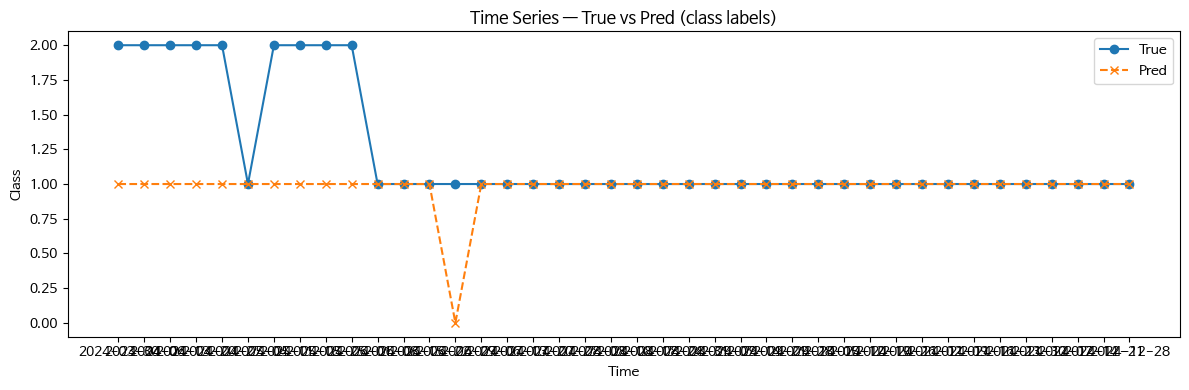

In [ ]:
#spi6
# X를 2D로 펼치기
def flatten_3d(X):
    # X: (N, T, F) -> (N, T*F)
    return X.reshape(X.shape[0], -1)

X_tr = flatten_3d(X_train_win_spi)
X_te = flatten_3d(X_test_win_spi)


# 모델 정의 & 학습
num_classes = len(set(y_train_win_spi))
model = XGBClassifier(
    n_estimators=600,
    max_depth=4,
    learning_rate=0.01,
    objective='multi:softmax',
    subsample=0.8,
    colsample_bytree=0.8,
    num_class=num_classes,
    random_state=42
)
model.fit(X_tr, y_train_win_spi)

# 예측
pred = model.predict(X_te)        # 정수형 클래스 레이블이 반환됩니다.

from sklearn.metrics import (accuracy_score, balanced_accuracy_score, classification_report, f1_score)

# y_test 준비
y_te = y_test_win_spi
if hasattr(y_te, "values"):  # pandas Series면 값만
    y_te = y_te.values
y_te = np.ravel(y_te)        # (N,)로

# 예측
y_pred = pred  # 이미 계산됨 (model.predict(X_te))

# 1) 숫자 지표
acc  = accuracy_score(y_te, y_pred)
bacc = balanced_accuracy_score(y_te, y_pred)

print("\n[Classification Report]")
print(classification_report(y_te, y_pred, digits=4))


# 준비물
time_step = X_train_win_spi.shape[1]   # 윈도우 길이
horizon   = 1                            # 다음 1주
y_te      = np.ravel(y_test_win_spi)   # (N,)

# 타깃 날짜 인덱스 만들기
start = time_step + horizon - 1
test_target_index = y_test.index[start : start + len(y_te)]

# 시계열 라인 플롯 (실제 vs 예측)
s_true = pd.Series(y_te, index=test_target_index, name="True")
s_pred = pd.Series(pred,  index=test_target_index, name="Pred")

plt.figure(figsize=(12,4))
plt.plot(s_true.index, s_true.values, marker='o', linestyle='-', label='True')
plt.plot(s_pred.index, s_pred.values, marker='x', linestyle='--', label='Pred')
plt.title("Time Series — True vs Pred (class labels)")
plt.xlabel("Time")
plt.ylabel("Class")
plt.legend()
plt.tight_layout()
plt.show()

